# **Avaliação da mobilidade no entorno da UFRN, em Natal-RN.**

Este trabalho tem como objetivo avaliar a mobilidade no entorno da UFRN, em Natal-RN, utilizando notebooks do OSMnx e a documentação da biblioteca. A análise busca identificar as melhores localizações para a implementação de dock-stations de compartilhamento de bicicletas nas proximidades da universidade, contribuindo para a melhoria da mobilidade e incentivando o uso de meios de transporte sustentável.


* Como forma analisar a rede foi decidido incluir os bairros de Lagoa Nova, Candelália, e Capim Macio, no entorno da UFRN, com nós dentro de um raio de 3km de distância.


In [2]:
#instalação da biblioteca
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 36.5 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [3]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

<ipython-input-4-070f3b56a211>:16: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. Note that the expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G1 = ox.truncate.truncate_graph_bbox(G1, ufrn_location[0] + 0.02, ufrn_location[0] - 0.02,
<ipython-input-4-070f3b56a211>:18: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. Note that the expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G2 = ox.truncate.truncate_graph_bbox(G2, ufrn_location[0] + 0.02, ufrn_location[0] - 0.02,
<ipython-input-4-070f3b56a

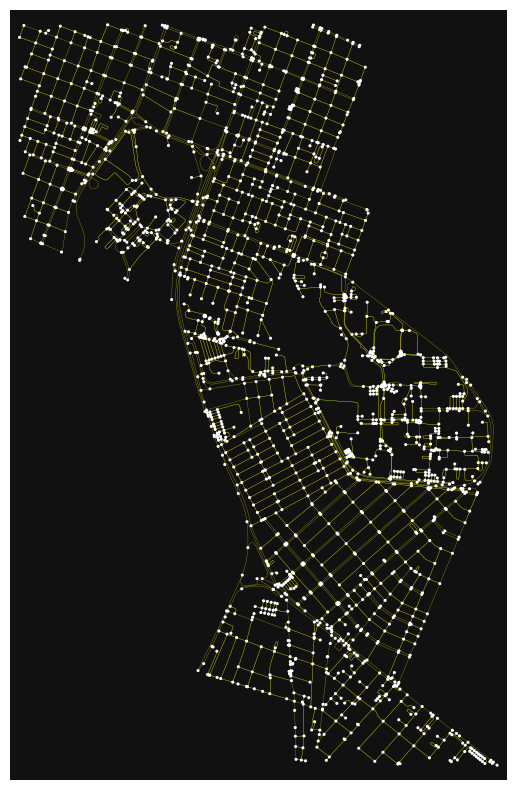

In [4]:

# Defina os nomes dos bairros e o ponto central (UFRN) com uma distância em metros para o recorte
bairro_1 = "Lagoa Nova, Natal, Rio Grande do Norte, Brasil"
bairro_2 = "Capim Macio, Natal,  Rio Grande do Norte, Brasil"
bairro_3 = "Candelaria, Natal,  Rio Grande do Norte, Brasil"

# Coordenadas aproximadas da UFRN para o recorte
ufrn_location = (-5.8390, -35.2007)  # Latitude e longitude aproximada da UFRN
distancia = 3000  # Distância em metros para criar um buffer em torno da UFRN

# Baixar as redes de ruas para cada bairro
G1 = ox.graph_from_place(bairro_1, network_type="bike")
G2 = ox.graph_from_place(bairro_2, network_type="bike")
G3 = ox.graph_from_place(bairro_3, network_type="bike")

# Criar um grafo de recorte ao redor da UFRN
G1 = ox.truncate.truncate_graph_bbox(G1, ufrn_location[0] + 0.02, ufrn_location[0] - 0.02,
                                     ufrn_location[1] + 0.02, ufrn_location[1] - 0.02)
G2 = ox.truncate.truncate_graph_bbox(G2, ufrn_location[0] + 0.02, ufrn_location[0] - 0.02,
                                     ufrn_location[1] + 0.02, ufrn_location[1] - 0.02)
G3 = ox.truncate.truncate_graph_bbox(G1, ufrn_location[0] + 0.02, ufrn_location[0] - 0.02,
                                     ufrn_location[1] + 0.02, ufrn_location[1] - 0.02)
# Combine as redes dos dois bairros
G_combined = nx.compose(G1, G2)
G_combined1 = nx.compose(G_combined, G3)
# Extraia os graus dos nós
degree_sequence = [degree for node, degree in G_combined1.degree()]

fig, ax = ox.plot_graph(G_combined1, figsize=(10, 10), node_size=5, edge_color="y", edge_linewidth=0.2)



* Nós: Os nós representam pontos de interseção, cruzamentos ou locais onde as ruas começam ou terminam, como acessos e ramificações.

* Arestas: As arestas correspondem às ruas ou segmentos de rua que ligam dois nós, representando os trechos percorríveis da via entre interseções ou outros pontos importantes na rede.



# **Requisito 1 - Métricas de centralidade**

## **Centralidade de graus**

A centralidade de grau mede quantas conexões diretas um nó tem em uma rede. Ou seja, é o número de ligações que ele possui com outros nós. Esta ajuda a identificar os nós mais conectados em uma rede, mostrando quem ou o que está mais "conectado".


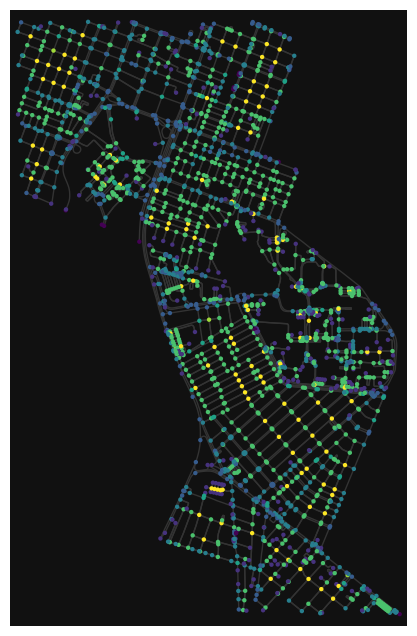

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [5]:

# Calcular o grau de centralidade para cada nó na rede
degree_centrality = nx.degree_centrality(G_combined1)

# Adicionar o grau de centralidade como atributo de cada nó no grafo
nx.set_node_attributes(G_combined1, degree_centrality, "degree_centrality")

# Para visualizar a rede com a centralidade de grau
ox.plot_graph(G_combined1, node_color=[degree_centrality[node] for node in G_combined1.nodes], node_size=10, edge_color="#333333")

Na rede acima, os nós em azul indicam uma centralidade de grau menor (menos conexões ou menor importância na rede viária). Enquanto, os nós em amarelo possuem maior centralidade de grau, indicando pontos de maior conexão e, possivelmente, áreas mais movimentadas ou interseções centrais.

## **Centralidade de Proximidade**

A centralidade de proximidade avalia a posição de um nó em relação a todos os outros nós de uma rede, determinando o quão "próximo" ele está dos demais. Em vez de focar nas conexões diretas (como a centralidade de grau), essa medida considera a distância total de um nó a todos os outros, indicando quão facilmente ele pode alcançar os demais.

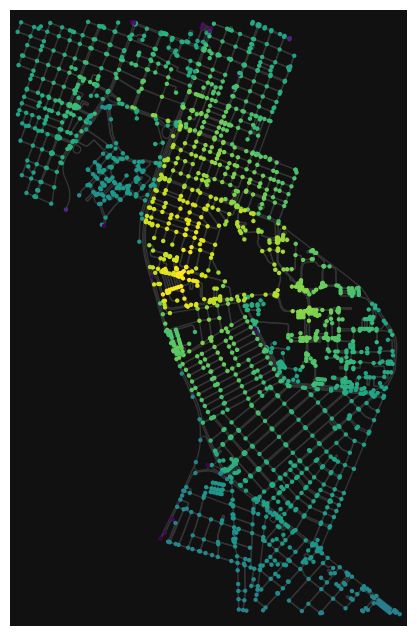

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [6]:
# Calcular a centralidade de proximidade para cada nó na rede
closeness_centrality = nx.closeness_centrality(G_combined1, distance="length")

# Adicionar a centralidade de proximidade como atributo de cada nó no grafo
nx.set_node_attributes(G_combined1, closeness_centrality, "closeness_centrality")

# Para visualizar a rede com a centralidade de proximidade
ox.plot_graph(G_combined1, node_color=[closeness_centrality[node] for node in G_combined1.nodes], node_size=10, edge_color="#333333")

Na rede acima os nós em tons mais claros (amarelos)apresentam uma centralidade de proximidade mais alta, o que significa que são interseções com acessibilidade vantajosa, possivelmente no centro do bairro ou em pontos de convergência de várias ruas. Esses nós estão em uma posição central dentro da rede e podem ser alcançados mais rapidamente a partir de qualquer outro nó. Diferente dos nós em tons mais escuros (azul e roxo), ou seja, estes nós têm centralidade de proximidade mais baixa, o que indica que estão em regiões menos conectadas. Eles provavelmente precisam de mais etapas (ou ruas) para acessar a maioria dos outros pontos da rede.

# **Centralidade de Intermediação**

A centralidade de intermediação quantifica o papel de um nó como intermediário em uma rede. Esta avalia quantas vezes um nó aparece nos caminhos mais curtos entre outros pares de nós. Essa medida é útil para identificar nós que atuam como "pontes" ou "conectores" na rede, influenciando o fluxo de informações.


---







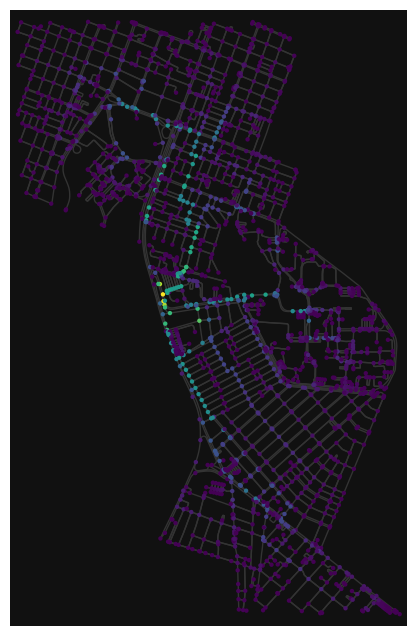

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [7]:

# Calcular a centralidade de intermediação para cada nó na rede
betweenness_centrality = nx.betweenness_centrality(G_combined1, weight="length", normalized=True)

# Adicionar a centralidade de intermediação como atributo de cada nó no grafo
nx.set_node_attributes(G_combined1, betweenness_centrality, "betweenness_centrality")

# Para visualizar a rede com a centralidade de intermediação
ox.plot_graph(
    G_combined1,
    node_color=[betweenness_centrality[node] for node in G_combined1.nodes],
    node_size=10,
    edge_color="#333333",
)

Na rede acima, os nós em tons mais claros (amarelos e verdes) têm uma alta centralidade de intermediação, significando que eles atuam como pontos de passagem chave na rede. Já os nós em tons mais escuros (roxo) têm baixa centralidade de intermediação, o que indica que são menos importantes para a conectividade geral da rede. Eles estão frequentemente localizados nas periferias ou em ruas que não servem como rotas principais de tráfego.



# **Centralidade de Autovetor**


A centralidade de autovetor  mede a importância de um nó em uma rede, levando em consideração não apenas o número de conexões diretas (como na centralidade de grau), mas também a importância dos nós aos quais ele está conectado. Isso significa que, para que um nó tenha uma alta centralidade de autovetor, ele precisa estar conectado a outros nós que também são importantes na rede.


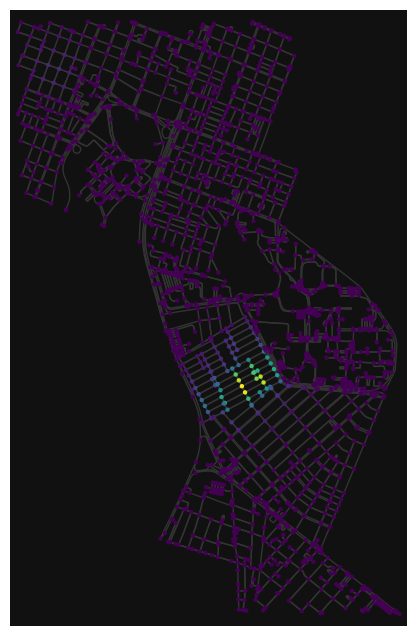

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [8]:
# Convert the MultiDiGraph to a DiGraph
G_digraph = nx.DiGraph(G_combined1)

# Calcular a centralidade de autovetor para cada nó na rede
# Usamos o algoritmo iterativo de autovetor de NetworkX
eigenvector_centrality = nx.eigenvector_centrality(G_digraph, max_iter=1000, tol=1e-06)

# Adicionar a centralidade de autovetor como atributo de cada nó no grafo
nx.set_node_attributes(G_combined1, eigenvector_centrality, "eigenvector_centrality")

# Para visualizar a rede com a centralidade de autovetor
ox.plot_graph(
    G_combined1,
    node_color=[eigenvector_centrality[node] for node in G_combined1.nodes],
    node_size=10,
    edge_color="#333333")

Na rede os nós com tons mais claros (amarelo ou verde claro) representam locais com alta centralidade de autovetor. Esses pontos são fundamentais para a estrutura da rede, pois estão conectados a outros nós influentes e com grande fluxo. Diferente dos nós em tons mais escuros (roxo).



# **Requisito 2 - PDF e CDF**




# **Requisito 2 - PDF e CDF**

# Curva de Densidade de Probabilidade (PDF)

A PDF dos graus em uma rede é uma representação que permite visualizar como os graus dos nós estão distribuídos ao longo da rede. Ela fornece uma estimativa contínua da distribuição dos graus e indica a frequência relativa de cada grau, ou seja, com que frequência certos graus aparecem em comparação com outros.

# Função de Distribuição Acumulada (CDF)

A CDF dos graus em uma rede é uma ferramenta poderosa para analisar a conectividade da rede. Ela mostra a proporção acumulada de nós com grau igual ou inferior a um determinado valor, permitindo identificar rapidamente a distribuição da conectividade entre os nós.

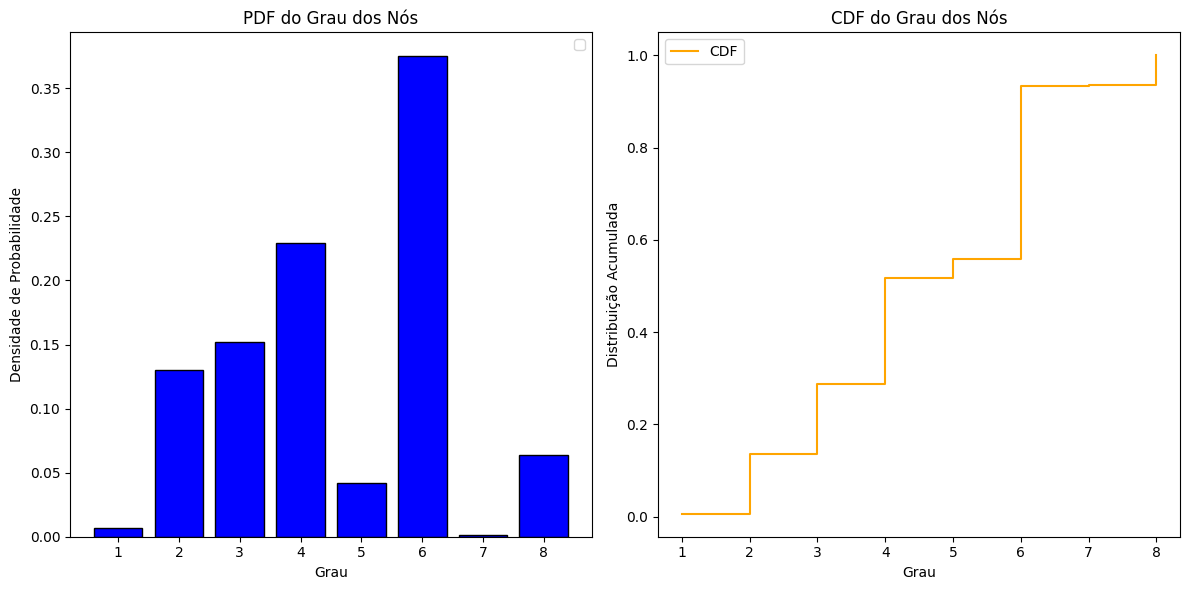

In [9]:
import numpy as np

# Extraia os graus dos nós
degree_sequence = [degree for node, degree in G_combined1.degree()]

# Calcule o PDF (histograma normalizado) dos graus
# Use o mesmo número de bins (ou range) para pdf e degree_counts
# Aqui, usamos range(1, max(degree_sequence) + 2) para consistência:
pdf, bins = np.histogram(degree_sequence, bins=range(1, max(degree_sequence) + 2), density=True)

# Calcule a CDF (função de distribuição acumulada)
cdf = np.cumsum(pdf) * np.diff(bins)

# Calcular a PDF (densidade de probabilidade) do grau dos nós
# Não recalculamos bins aqui, pois já foi definido acima
degree_counts = pdf  # degree_counts é o mesmo que pdf neste caso


# Plotar o PDF e CDF dos graus dos nós
plt.figure(figsize=(12, 6))

# Gráfico PDF
plt.subplot(1, 2, 1)
plt.bar(bins[:-1], degree_counts, color='blue', edgecolor='black')
plt.xlabel("Grau")
plt.ylabel("Densidade de Probabilidade")
plt.title("PDF do Grau dos Nós")
plt.legend()

# Gráfico CDF
plt.subplot(1, 2, 2)
plt.step(bins[:-1], cdf, where="post", color="orange", label="CDF")
plt.xlabel("Grau")
plt.ylabel("Distribuição Acumulada")
plt.title("CDF do Grau dos Nós")
plt.legend()

plt.tight_layout()
plt.show()

O grau mais frequente na rede é em torno de 6, indicando que a maioria dos nós tende a ter aproximadamente 6 conexões.



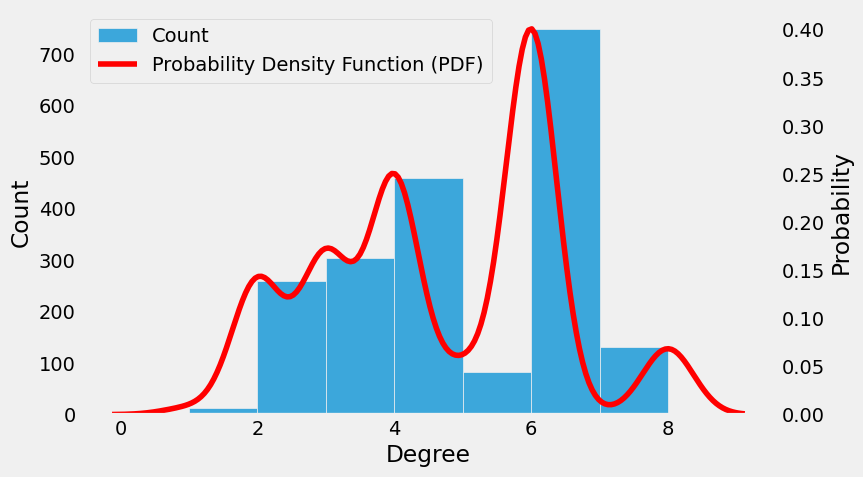

In [10]:
!pip install seaborn
import seaborn as sns

plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(8,5))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Probability Density Function (PDF)",ax=ax2)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('probability_density_function.png', transparent=True,dpi=600,bbox_inches="tight")
plt.show()

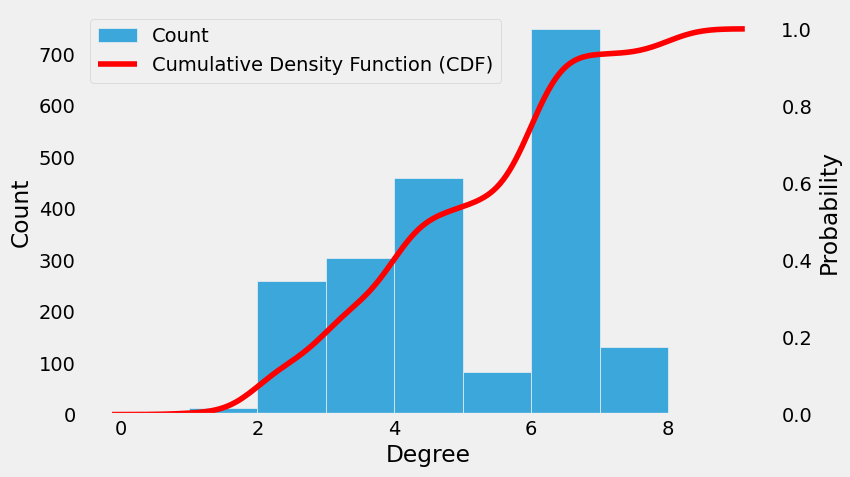

In [11]:


plt.style.use("fivethirtyeight")
#plt.style.use("default")

fig, ax = plt.subplots(1,1,figsize=(8,5))

sns.histplot(degree_sequence,bins=7,label="Count",ax=ax)
ax2 = ax.twinx()
sns.kdeplot(degree_sequence,color='r',label="Cumulative Density Function (CDF)",ax=ax2,cumulative=True)

# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

ax.grid(False)
ax2.grid(False)
ax.set_xlabel("Degree")
ax2.set_ylabel("Probability")

plt.savefig('cumulative_density_function.png', transparent=True,dpi=600,bbox_inches="tight")

plt.show()


# **Requisito 3 - Analise da Matriz de Correlação das Métricas de Centralidade**

* Na diagonal principal, observa-se a distribuição de cada métrica de forma isolada. A aparência dessa distribuição (se é normal, bimodal, etc.) pode revelar características específicas da rede. Por exemplo, uma distribuição de grau com uma cauda longa indica que há poucos nós com um grande número de conexões.

* A sobreposição das distribuições pode sugerir que algumas métricas estão refletindo informações parecidas. Por exemplo, se as distribuições de grau (degree) e intermediação (betweenness) apresentam uma grande sobreposição, isso pode indicar que os nós com alto grau também tendem a ter alta intermediação, sugerindo que são tanto bem conectados quanto frequentemente atravessados em caminhos na rede.

Fora da diagonal principal, encontram-se as correlações entre pares de métricas. Valores próximos de 1 indicam uma forte correlação positiva, o que significa que, ao aumentar uma métrica, a outra também tende a crescer. Valores próximos de -1 revelam uma forte correlação negativa, indicando que, quando uma métrica aumenta, a outra tende a diminuir. Valores próximos de 0 sugerem que não há uma relação clara ou consistente entre as métricas.
![](imagens/9.0.png)

Degree e Betweenness: Uma forte correlação positiva entre essas métricas sugere que nós com mais conexões (alto degree) também tendem a ocupar posições estratégicas nos caminhos mais curtos entre outros nós (alto betweenness). Isso é esperado, pois nós com alta conectividade geralmente desempenham um papel importante na ligação entre diferentes regiões da rede.

Closeness e Betweenness: Uma correlação positiva moderada entre closeness e betweenness indica que os nós que estão mais próximos de todos os outros (alto closeness) também costumam aparecer nos caminhos mais curtos entre pares de nós (alto betweenness). Isso é esperado, já que nós centrais, com alta proximidade em relação aos demais, tendem a ter um papel relevante na intermediação do fluxo da rede.


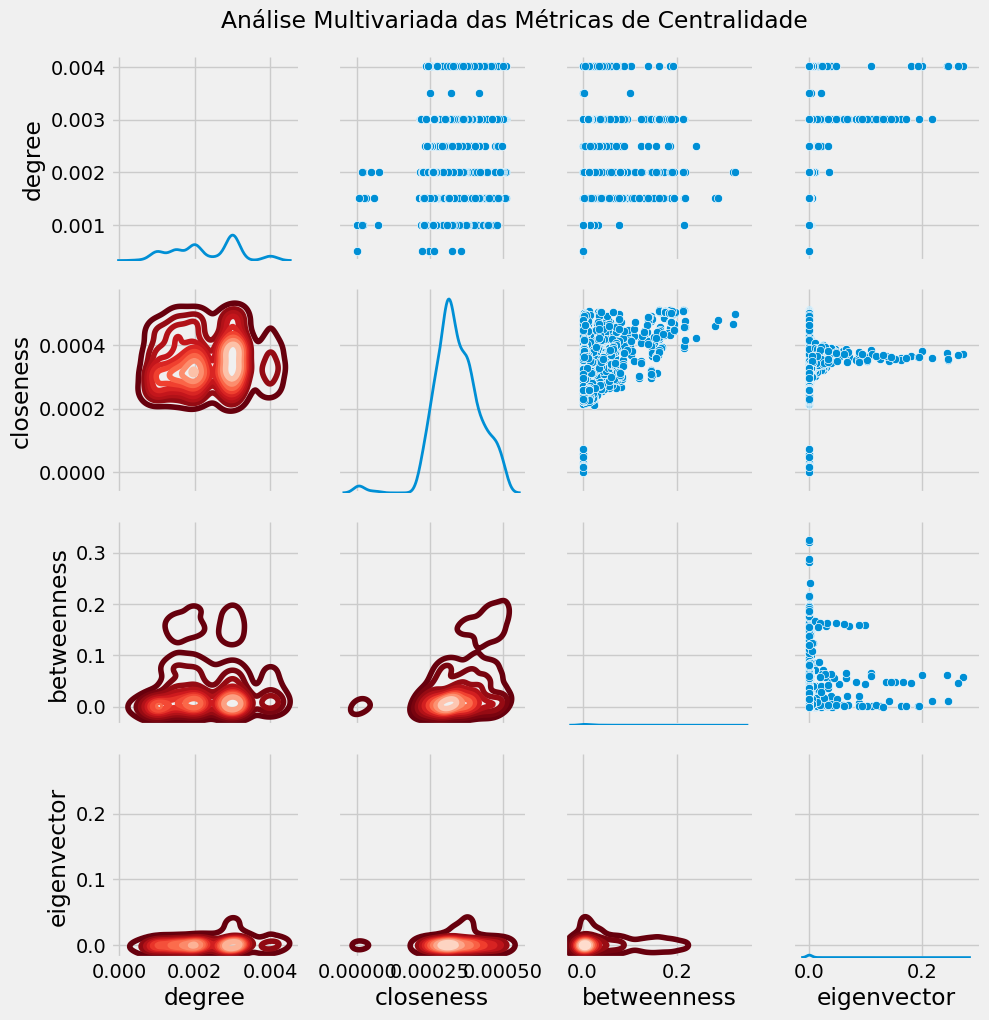

In [12]:

import pandas as pd

#
# 1. Criar um DataFrame com as métricas de centralidade
centrality_data = {
    'degree': [degree_centrality[node] for node in G_digraph.nodes()],
    'closeness': [closeness_centrality[node] for node in G_digraph.nodes()],
    'betweenness': [betweenness_centrality[node] for node in G_digraph.nodes()],
}

if 'eigenvector_centrality' in locals():
    centrality_data['eigenvector'] = [eigenvector_centrality[node] for node in G_digraph.nodes()]

# Criar o DataFrame
df = pd.DataFrame(centrality_data)

# 2. Análise multivariada com PairGrid
fig = sns.PairGrid(df)
fig.map_upper(sns.scatterplot)  # Plota scatterplot na parte superior
fig.map_lower(sns.kdeplot, cmap="Reds_r")  # Plota KDE na parte inferior
fig.map_diag(sns.kdeplot, lw=2, legend=False)  # Plota KDE na diagonal

plt.suptitle("Análise Multivariada das Métricas de Centralidade", y=1.02)  # Título da figura
plt.show()


# **Requisito 4: Quem é o core/shell da rede?**

**Core:**

Na rede apresentada, os nós do core (vermelhos) são os mais conectados, possuindo um número elevado de conexões (grau). Eles desempenham um papel crucial na estrutura da rede, pois estão bem posicionados para facilitar o acesso e a mobilidade. No contexto de um sistema de compartilhamento de bicicletas, esses nós representam locais estratégicos e altamente acessíveis, funcionando como pontos de partida ou chegada ideais. Instalar estações de bicicletas compartilhadas nesses pontos pode aumentar a eficiência do sistema, maximizando a utilização e o fluxo de usuários.

**Shell:**

Os nós do shell (azuis), por sua vez, têm uma conectividade mais baixa e estão localizados nas bordas da rede. Esses pontos podem representar áreas com menor acesso às rotas principais ou que não são tão frequentemente utilizadas. Embora não sejam pontos centrais ou de maior tráfego, eles ainda desempenham um papel importante ao garantir a conectividade entre regiões periféricas e as partes centrais da rede. A implementação de estações de bicicletas compartilhadas em alguns desses pontos pode incentivar o uso de bicicletas em áreas menos exploradas, promovendo uma mobilidade mais inclusiva e equilibrada em toda a rede.


Nós do Core (grau > 6.33): [501286371, 501006398, 506036618, 6376363667, 501006547, 6345285755, 11007692416, 501118379, 6345285751, 501152617, 501271794, 702325638, 502752712, 526587328, 504801628, 505506202, 526588712, 503784396, 506566853, 505095737, 2718229209, 505095706, 6376363713, 504799354, 504799477, 504801627, 526588707, 504801621, 526588687, 526588693, 526588711, 504801632, 526589265, 505084219, 505095732, 505096025, 505095752, 505095734, 505096243, 505104146, 505505758, 506566942, 505506005, 529773028, 583261765, 506566941, 583261766, 583261768, 506566940, 505920523, 6345285775, 5258347433, 506037928, 506566854, 506566855, 583261763, 4839017278, 526587331, 4839017265, 526588675, 526588688, 526588691, 7183216875, 567698234, 567698296, 567698313, 6345285773, 6376363718, 6376363717, 8943553036, 1949860228, 6376363730, 9024122545, 6376363719, 6376363687, 4839017246, 4839017247, 4839017256, 6956477612, 7590379827, 501834757, 585798880, 501834691, 501834719, 501834699, 501834695, 

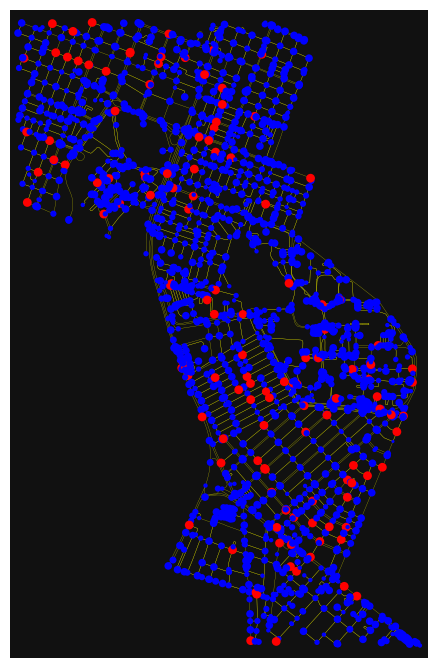

In [13]:
# Converter a rede de OSMnx para um grafo de NetworkX
H = ox.project_graph(G_combined1)

# Calcular a centralidade dos graus dos nós
degree_centrality = np.array(list(dict(H.degree()).values()))
mean_degree = np.mean(degree_centrality)
std_degree = np.std(degree_centrality)

# Definir limites para o core e shell
core_threshold = mean_degree + std_degree  # Limite superior para o core
shell_threshold = mean_degree - std_degree  # Limite inferior para o shell

# Identificar nós do core e do shell
core_nodes = [n for n, d in H.degree() if d > core_threshold]
shell_nodes = [n for n, d in H.degree() if d < shell_threshold]

# Imprimir resultados
print(f"Nós do Core (grau > {core_threshold:.2f}): {core_nodes}")
print(f"Nós do Shell (grau < {shell_threshold:.2f}): {shell_nodes}")

# Definir tamanhos de nós
node_color = ['r' if n in core_nodes else 'b' for n in H.nodes()]
# Definir tamanhos de nós com um fator de escala menor
node_size = [degree_centrality[i] * 5 for i in range(len(H.nodes()))]  # Alterado para 10

# Visualização da rede com o core e shell
fig, ax = ox.plot_graph(G_combined1, node_color=node_color, node_size=node_size, edge_color='y', edge_linewidth=0.2)



# **Resultados**

De acordo com as análises, a distribuição da mobilidade e conectividade ao redor da UFRN, os bairros Lagoa Nova, Candelária e Capim Macio apresentaram altos índices de centralidade. Com base nas métricas, foram identificados alguns locais em potenciais para a instalação de dock-stations de bicicletas compartilhadas, levando em consideração as áreas com alta conectividade e proximidade.
